 #  A Portfolio-Inflation Analyser
 ---

 In this project, we will use what we have learned over the past few weeks to evaluate the performance of 3 kinds of portfolio ETFs
 (a) Conservative (b) Growth and (c) Moderate over the last 10 years 2012-2021. 
 We will evaluate which asset classes performed better given the impact of inflation. 
 Tech requirements to keep in mind: 1. Use panda's to clean and format data sets 2. Describe the data exploration and cleanup  3. Create 6-8 visualizations  4. Aggregate the visualizations into a dashboard 5. Use an API and atleast one new python library
 

In [74]:
# Initial imports

from panel.interact import interact
import plotly.express as px
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pip
from bokeh.models.formatters import DatetimeTickFormatter


%matplotlib inline

In [75]:
import panel as pn
pn.extension('plotly')
pn.extension('katex')


# Data Gathering

We used the Google Finance function to obtain the data for last 10 years for the following Tickers
and saved them as csv files (formatted Date to remove time component) in Resources Folder.

* VTSMX	Vanguard Total Stock Mkt Idx Inv: ' =GOOGLEFINANCE("VTSMX", "price", "1/1/2012", "12/31/2021", "DAILY") '
* VGTSX	Vanguard Total International Stock Index Inv: ' =GOOGLEFINANCE("VGTSX", "price", "1/1/2012", "12/31/2021", "DAILY") '
* VBMFX	Vanguard Total Bond Market Index Inv: ' =GOOGLEFINANCE("VBMFX", "price", "1/1/2012", "12/31/2021", "DAILY") '
* PIGLX	PIMCO Global Bond Opps (Unhedged): ' =GOOGLEFINANCE("PIGLX", "price", "1/1/2012", "12/31/2021", "DAILY")' '

Files:

* `VTSMX_data.csv`: Contains closing prices of Vanguard Total Stock Market Index Fund Investor Shares

* `VGTSX_data.csv`: Contains closing prices of Vanguard Total International Stock Index Fund Investor Shares

* `VBMFX_data.csv`: Contains closing prices of Vanguard Total Bond Market Index Fund Investor Shares

* `PIGLX_data.csv`: Contains closing prices of PIMCO Global Bond Opportunities Fund (Unhedged)

# Data Cleaning

In this section, we read the CSV files into DataFrames and perform any necessary data cleaning steps

## VTSMX Data
Read the VTSMX csv and clean the data.

In [76]:
# Set the Path
vtsmx_data = Path("Resources/VTSMX_data.csv")

# Read the historic closing prices and create a new DataFrame from the data. 
vtsmx_df = pd.read_csv(vtsmx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vtsmx_df.sort_index(inplace=True)
vtsmx_df.head()

,Close
Date,
2012-01-03,31.76
2012-01-04,31.75
2012-01-05,31.87
2012-01-06,31.81
2012-01-09,31.90


In [77]:
# Check Data Types
print(vtsmx_df.dtypes)

Close    float64
dtype: object


In [78]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vtsmx_df = vtsmx_df.resample('M').last()
vtsmx_df

,Close
Date,
2012-01-31,32.88
2012-02-29,34.28
2012-03-31,35.19
2012-04-30,34.96
2012-05-31,32.78
...,...
2021-08-31,113.46
2021-09-30,108.06
2021-10-31,115.31


In [79]:
# Calculate Monthly Returns
vtsmx_df['Monthly Returns'] = vtsmx_df['Close'].pct_change()
vtsmx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,32.88,NaN
2012-02-29,34.28,0.042579
2012-03-31,35.19,0.026546
2012-04-30,34.96,-0.006536
2012-05-31,32.78,-0.062357


In [80]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VTSMX Close", "VTSMX Returns"]
vtsmx_df.columns = columns
vtsmx_df.head()

,VTSMX Close,VTSMX Returns
Date,,
2012-01-31,32.88,NaN
2012-02-29,34.28,0.042579
2012-03-31,35.19,0.026546
2012-04-30,34.96,-0.006536
2012-05-31,32.78,-0.062357


In [81]:
# Count nulls
vtsmx_df.isnull().sum()

VTSMX Close      0
VTSMX Returns    1
dtype: int64

In [82]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vtsmx_df.dropna(inplace=True)
# Check no more nulls
vtsmx_df.isnull().sum()

VTSMX Close      0
VTSMX Returns    0
dtype: int64

## VGTSX Data
Read the VGTSX csv and clean the data.


In [83]:
# Set the Path
vgtsx_data = Path("Resources/VGTSX_data.csv")

# Read the historic closing prices and create a new DataFrame from the data. 
vgtsx_df = pd.read_csv(vgtsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vgtsx_df.sort_index(inplace=True)
vgtsx_df.head()

,Close
Date,
2012-01-03,13.43
2012-01-04,13.39
2012-01-05,13.23
2012-01-06,13.11
2012-01-09,13.15


In [84]:
# Check Data Types
print(vgtsx_df.dtypes)

Close    float64
dtype: object


In [85]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vgtsx_df = vgtsx_df.resample('M').last()
vgtsx_df

,Close
Date,
2012-01-31,14.01
2012-02-29,14.73
2012-03-31,14.62
2012-04-30,14.36
2012-05-31,12.76
...,...
2021-08-31,21.16
2021-09-30,20.33
2021-10-31,20.86


In [86]:
# Calculate Monthly Returns
vgtsx_df['Monthly Returns'] = vgtsx_df['Close'].pct_change()
vgtsx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,14.01,NaN
2012-02-29,14.73,0.051392
2012-03-31,14.62,-0.007468
2012-04-30,14.36,-0.017784
2012-05-31,12.76,-0.111421


In [87]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VGTSX Close", "VGTSX Returns"]
vgtsx_df.columns = columns
vgtsx_df.head()

,VGTSX Close,VGTSX Returns
Date,,
2012-01-31,14.01,NaN
2012-02-29,14.73,0.051392
2012-03-31,14.62,-0.007468
2012-04-30,14.36,-0.017784
2012-05-31,12.76,-0.111421


In [88]:
# Count nulls
vgtsx_df.isnull().sum()

VGTSX Close      0
VGTSX Returns    1
dtype: int64

In [89]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vgtsx_df.dropna(inplace=True)
# Check no more nulls
vgtsx_df.isnull().sum()

VGTSX Close      0
VGTSX Returns    0
dtype: int64

## VBMFX Data
Read the VBMFX csv and clean the data.


In [90]:
# Set the Path
vbmfx_data = Path("Resources/VBMFX_data.csv")

# Read the historic closing prices and create a new DataFrame from the data. 
vbmfx_df = pd.read_csv(vbmfx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vbmfx_df.sort_index(inplace=True)
vbmfx_df.head()

,Close
Date,
2012-01-03,10.98
2012-01-04,10.97
2012-01-05,10.96
2012-01-06,10.98
2012-01-09,10.99


In [91]:
# Check Data Types
print(vbmfx_df.dtypes)

Close    float64
dtype: object


In [92]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vbmfx_df = vbmfx_df.resample('M').last()
vbmfx_df

,Close
Date,
2012-01-31,11.07
2012-02-29,11.04
2012-03-31,10.94
2012-04-30,11.04
2012-05-31,11.12
...,...
2021-08-31,11.39
2021-09-30,11.27
2021-10-31,11.25


In [93]:
# Calculate Monthly Returns
vbmfx_df['Monthly Returns'] = vbmfx_df['Close'].pct_change()
vbmfx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,11.07,NaN
2012-02-29,11.04,-0.002710
2012-03-31,10.94,-0.009058
2012-04-30,11.04,0.009141
2012-05-31,11.12,0.007246


In [94]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VBMFX Close", "VBMFX Returns"]
vbmfx_df.columns = columns
vbmfx_df.head()

,VBMFX Close,VBMFX Returns
Date,,
2012-01-31,11.07,NaN
2012-02-29,11.04,-0.002710
2012-03-31,10.94,-0.009058
2012-04-30,11.04,0.009141
2012-05-31,11.12,0.007246


In [95]:
# Count nulls
vbmfx_df.isnull().sum()

VBMFX Close      0
VBMFX Returns    1
dtype: int64

In [96]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vbmfx_df.dropna(inplace=True)
# Check no more nulls
vbmfx_df.isnull().sum()

VBMFX Close      0
VBMFX Returns    0
dtype: int64

## PIGLX Data

Read the PIGLX csv and clean the data.

In [97]:
# Set the Path
piglx_data = Path("Resources/PIGLX_data.csv")

# Read the historic closing prices and create a new DataFrame from the data. 
piglx_df = pd.read_csv(piglx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
piglx_df.sort_index(inplace=True)
piglx_df.head()

,Close
Date,
2012-01-03,10.07
2012-01-04,10.04
2012-01-05,10.01
2012-01-06,10.03
2012-01-09,10.06


In [98]:
# Check Data Types
print(piglx_df.dtypes)

Close    float64
dtype: object


In [99]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
piglx_df = piglx_df.resample('M').last()
piglx_df

,Close
Date,
2012-01-31,10.27
2012-02-29,10.10
2012-03-31,10.07
2012-04-30,10.25
2012-05-31,10.11
...,...
2021-08-31,9.52
2021-09-30,9.42
2021-10-31,9.33


In [100]:
# Calculate Monthly Returns
piglx_df['Monthly Returns'] = piglx_df['Close'].pct_change()
piglx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,10.27,NaN
2012-02-29,10.10,-0.016553
2012-03-31,10.07,-0.002970
2012-04-30,10.25,0.017875
2012-05-31,10.11,-0.013659


In [101]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["PIGLX Close", "PIGLX Returns"]
piglx_df.columns = columns
piglx_df.head()

,PIGLX Close,PIGLX Returns
Date,,
2012-01-31,10.27,NaN
2012-02-29,10.10,-0.016553
2012-03-31,10.07,-0.002970
2012-04-30,10.25,0.017875
2012-05-31,10.11,-0.013659


In [102]:
# Count nulls
piglx_df.isnull().sum()

PIGLX Close      0
PIGLX Returns    1
dtype: int64

In [103]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
piglx_df.dropna(inplace=True)
# Check no more nulls
piglx_df.isnull().sum()

PIGLX Close      0
PIGLX Returns    0
dtype: int64

## Combine VBMFX, PIGLX, VGTSX, and VTSMX Returns

In [104]:
# Join all returns dataframes intp a single one. Drop columns so we have left only the ones with returns
all_returns_df = pd.concat([vbmfx_df, piglx_df, vgtsx_df, vtsmx_df], axis="columns", join="inner")

all_returns_df = all_returns_df.drop(all_returns_df.filter(regex='Close').columns, axis=1)
all_returns_df

,VBMFX Returns,PIGLX Returns,VGTSX Returns,VTSMX Returns
Date,,,,
2012-02-29,-0.002710,-0.016553,0.051392,0.042579
2012-03-31,-0.009058,-0.002970,-0.007468,0.026546
2012-04-30,0.009141,0.017875,-0.017784,-0.006536
2012-05-31,0.007246,-0.013659,-0.111421,-0.062357
2012-06-30,-0.001799,0.002967,0.060345,0.034167
...,...,...,...,...
2021-08-31,-0.003500,-0.004184,0.017308,0.028556
2021-09-30,-0.010536,-0.010504,-0.039225,-0.047594
2021-10-31,-0.001775,-0.009554,0.026070,0.067092


## Calculate the weighted returns for CONSERVATIVE portfolio

In [105]:
# Set weights for conservative portfolio (reference on allocation available in ReadMe)
weights1 = [0.48, 0.12, 0.14, 0.26]

# Calculate portfolio returns
conservative_df = all_returns_df.dot(weights1)

# Display sample data
conservative_df

Date
2012-02-29    0.014978
2012-03-31    0.001152
2012-04-30    0.002343
2012-05-31   -0.029972
2012-06-30    0.016825
                ...   
2021-08-31    0.007666
2021-09-30   -0.024183
2021-10-31    0.019095
2021-11-30   -0.010357
2021-12-31    0.003726
Freq: M, Length: 119, dtype: float64

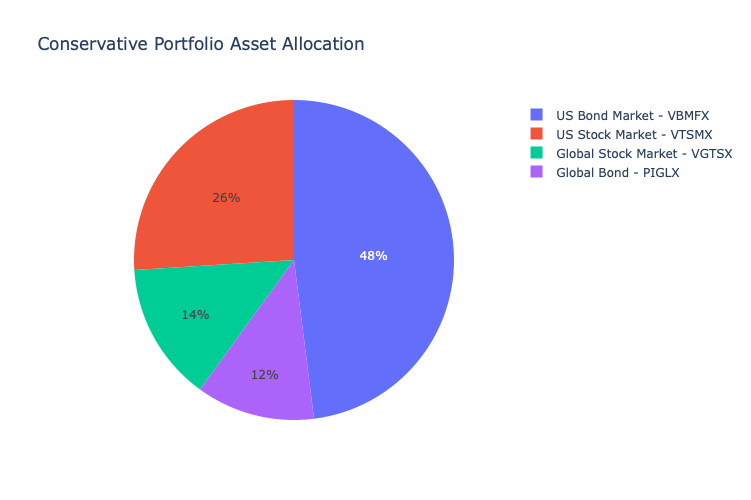

In [106]:
# Set labels for portfolio allocation visualizations 
labels = ['US Bond Market - VBMFX ','Global Bond - PIGLX','Global Stock Market - VGTSX','US Stock Market - VTSMX']

#Show asset allocation of conservative portfolio in a chart
fig1 = go.Figure(data=[go.Pie(labels=labels, values=weights1)])
fig1.update_layout(title="Conservative Portfolio Asset Allocation", height=500, width=500)
fig1.show()

## Calculate the weighted returns for GROWTH portfolio

In [107]:
# Set weights for Growth portfolio (reference on allocation available in ReadMe)
weights2 = [0.16, 0.04, 0.28, 0.52]

# Calculate portfolio returns
growth_df = all_returns_df.dot(weights2)

# Display sample data
growth_df

Date
2012-02-29    0.035435
2012-03-31    0.010145
2012-04-30   -0.006201
2012-05-31   -0.063010
2012-06-30    0.034494
                ...   
2021-08-31    0.018968
2021-09-30   -0.037838
2021-10-31    0.041521
2021-11-30   -0.020207
2021-12-31    0.023149
Freq: M, Length: 119, dtype: float64

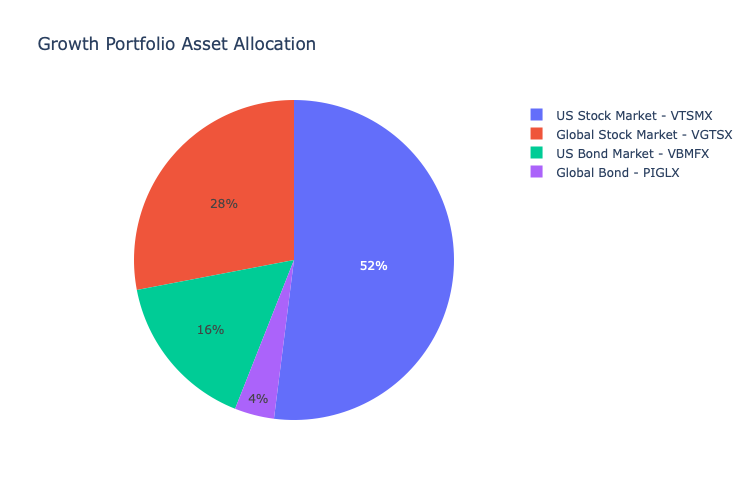

In [108]:
# Show asset allocation of growth portfolio in a chart 
fig2 = go.Figure(data=[go.Pie(labels=labels, values=weights2)])
fig2.update_layout(title="Growth Portfolio Asset Allocation", height=500, width=500)
fig2.show()


## Calculate the weighted returns for MODERATE portfolio

In [109]:
# Set weights for Moderate portfolio (reference on allocation available in ReadMe)
weights3 = [0.32, 0.08, 0.21, 0.39]

# Calculate portfolio returns
moderate_df = all_returns_df.dot(weights3)

# Display sample data
moderate_df

Date
2012-02-29    0.025207
2012-03-31    0.005649
2012-04-30   -0.001929
2012-05-31   -0.046491
2012-06-30    0.025659
                ...   
2021-08-31    0.013317
2021-09-30   -0.031011
2021-10-31    0.030308
2021-11-30   -0.015282
2021-12-31    0.013437
Freq: M, Length: 119, dtype: float64

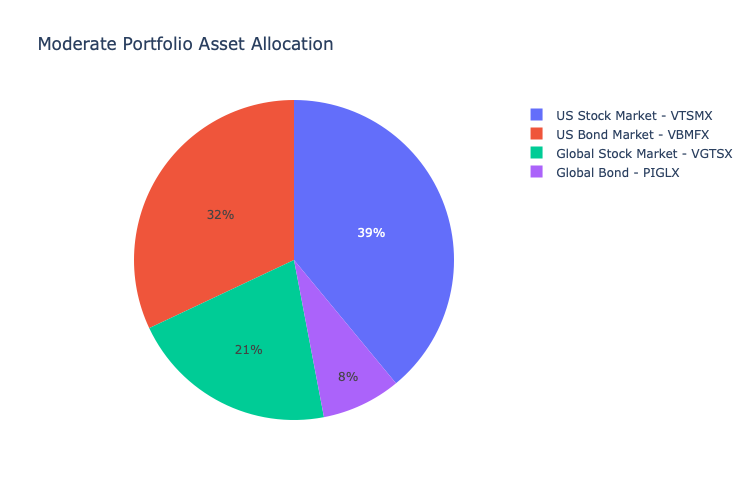

In [110]:
# Show asset allocation of moderate portfolio in a chart
fig3 = go.Figure(data=[go.Pie(labels=labels, values=weights3)])
fig3 = fig3.update_layout(title="Moderate Portfolio Asset Allocation", height=500, width=500)
fig3.show()

## Inflation Data
Read the Inflation csv and clean the data.

In [111]:
# Set path for inflation data file
inflation_path = Path("Resources/monthly_us_inflation_update.csv")

In [112]:
# Read the csv file containing monthly inflation data for US
inflation_df = pd.read_csv(inflation_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [113]:
# Sort index by ascending and manually verify that index has been sorted 
inflation_df.sort_index(ascending=True, inplace=True)
inflation_df.head()

,Inflation
Date,
2012-01-01,0.0293
2012-02-01,0.0287
2012-03-01,0.0265
2012-04-01,0.0230
2012-05-01,0.0170


In [114]:
# Count nulls
inflation_df.isnull().sum()

Inflation    0
dtype: int64

In [115]:
# Drop nulls
inflation_df.dropna(inplace=True)

In [116]:
# Verify there are no more nulls
inflation_df.isnull().sum()

Inflation    0
dtype: int64

In [117]:
# Describe the inflation data
inflation_df.describe()

,Inflation
count,120.000000
mean,0.018863
std,0.013138
min,-0.002000
25%,0.012275
50%,0.017050
75%,0.022025
max,0.071000


In [118]:
# Plot monthly inflation for US
##formatter = DatetimeTickFormatter(Month='%b')
inflation_df.hvplot(title='Monthly Inflation', grid=True, rot=90, width=1300, height=500)


:Curve   [Date]   (Inflation)

## Merging Conservative, Growth, Moderate Portfolios with Inflation Data

In [119]:
# Capturing only Year and Month for Conservative
conservative_df = conservative_df.reset_index()
conservative_df['Date'] = conservative_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
conservative_df.set_index('Date', inplace=True)

# Capturing only Year and Month for Growth
growth_df = growth_df.reset_index()
growth_df['Date'] = growth_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
growth_df.set_index('Date', inplace=True)

# Capturing only Year and Month for Modertate
moderate_df = moderate_df.reset_index()
moderate_df['Date'] = moderate_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
moderate_df.set_index('Date', inplace=True)

# Capturing only Year and Month for Inflation
inflation_df = inflation_df.reset_index()
inflation_df['Date'] = inflation_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
inflation_df.set_index('Date', inplace=True)

In [120]:
# Concatenate the Data frames
combined_return_inflation_df = pd.concat(
    [conservative_df, growth_df, moderate_df, inflation_df], axis="columns", join="inner"
)


# Set Column Names
combined_return_inflation_df.columns = ["Conservative_Returns", "Growth_Returns", "Moderate_Returns", "Inflation_Rate"]


combined_return_inflation_df.reset_index(inplace=True)
combined_return_inflation_df['Date'] = pd.to_datetime(combined_return_inflation_df['Date'])
combined_return_inflation_df.set_index('Date',inplace=True)
combined_return_inflation_df

,Conservative_Returns,Growth_Returns,Moderate_Returns,Inflation_Rate
Date,,,,
2012-02-01,0.014978,0.035435,0.025207,0.0287
2012-03-01,0.001152,0.010145,0.005649,0.0265
2012-04-01,0.002343,-0.006201,-0.001929,0.0230
2012-05-01,-0.029972,-0.063010,-0.046491,0.0170
2012-06-01,0.016825,0.034494,0.025659,0.0166
...,...,...,...,...
2021-08-01,0.007666,0.018968,0.013317,0.0525
2021-09-01,-0.024183,-0.037838,-0.031011,0.0539
2021-10-01,0.019095,0.041521,0.030308,0.0622


In [121]:
# Plot the monthly returns Vs Inflation
combined_return_inflation_df.hvplot.line(title='Monthly Returns of Portfolios Vs Monthly Inflation',
                                         rot=90, width=1300, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Calculate Cumulative Returns & Annualized Standard Deviation

In [122]:
#Merging the portfolio returns
combined_portfolio_return_df = pd.concat(
    [conservative_df, growth_df, moderate_df], axis="columns", join="inner"
)

# Add Column Names
combined_portfolio_return_df.columns = ["Conservative_Returns", "Growth_Returns", "Moderate_Returns"]
combined_return_inflation_df

# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolio_return_df).cumprod()

cumulative_returns.reset_index(inplace=True)
cumulative_returns['Date'] = pd.to_datetime(cumulative_returns['Date'])
cumulative_returns.set_index('Date',inplace=True)
cumulative_returns.head()

,Conservative_Returns,Growth_Returns,Moderate_Returns
Date,,,
2012-02-01,1.014978,1.035435,1.025207
2012-03-01,1.016148,1.045940,1.030998
2012-04-01,1.018529,1.039454,1.029009
2012-05-01,0.988001,0.973958,0.981169
2012-06-01,1.004624,1.007554,1.006345


In [123]:
# Calculate & Plot Cumulative returns of the Asset Classes
cumulative_returns_index = (1 + all_returns_df).cumprod()
#cumulative_returns_index.plot(figsize=(20, 10), title="Cumulative Daily Returns of All Index", ylabel = "Cumulative Daily Returns")
cumulative_returns_index.hvplot.line(title="Cumulative Daily Returns of All Index", rot=90, width=900, height=400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [124]:
# Plot cumulative returns of each portfolio
cumulative_returns.hvplot.line(title='Cumulative Returns of Conservative, Growth and Moderate', 
                               rot=90, width=900, height=400, )


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [125]:
# Calculate & Plot the annualized standard deviation (Monthly)
volatility = combined_return_inflation_df.std() * np.sqrt(12)
volatility.hvplot(kind='bar', width=700, height=300, title = "Volatitily Comparison")


:Bars   [index]   (0)

## Calculate Real Returns (Returns adjusted for Inflation)

In [126]:
# Calculate Conservative returns adjusted for inflation AKA "Real Returns"
real_returns_conservative = combined_return_inflation_df["Conservative_Returns"] - combined_return_inflation_df["Inflation_Rate"]
real_returns_conservative

Date
2012-02-01   -0.013722
2012-03-01   -0.025348
2012-04-01   -0.020657
2012-05-01   -0.046972
2012-06-01    0.000225
                ...   
2021-08-01   -0.044834
2021-09-01   -0.078083
2021-10-01   -0.043105
2021-11-01   -0.078457
2021-12-01   -0.067274
Length: 119, dtype: float64

In [127]:
# Calculate Growth returns adjusted for inflation AKA "Real Returns"
real_returns_growth = combined_return_inflation_df["Growth_Returns"] - combined_return_inflation_df["Inflation_Rate"]
real_returns_growth


Date
2012-02-01    0.006735
2012-03-01   -0.016355
2012-04-01   -0.029201
2012-05-01   -0.080010
2012-06-01    0.017894
                ...   
2021-08-01   -0.033532
2021-09-01   -0.091738
2021-10-01   -0.020679
2021-11-01   -0.088307
2021-12-01   -0.047851
Length: 119, dtype: float64

In [128]:
# Calculate Growth returns adjusted for inflation AKA "Real Returns"
real_returns_moderate = combined_return_inflation_df["Moderate_Returns"] - combined_return_inflation_df["Inflation_Rate"]
real_returns_moderate

Date
2012-02-01   -0.003493
2012-03-01   -0.020851
2012-04-01   -0.024929
2012-05-01   -0.063491
2012-06-01    0.009059
                ...   
2021-08-01   -0.039183
2021-09-01   -0.084911
2021-10-01   -0.031892
2021-11-01   -0.083382
2021-12-01   -0.057563
Length: 119, dtype: float64

In [129]:
# Join all real returns dataframes into a single one.
real_returns_df = pd.concat([real_returns_conservative, real_returns_growth, real_returns_moderate], axis="columns", join="inner")
real_returns_df

# Set Column Names
real_returns_df.columns = ["Real Conservative Returns", "Real Growth Returns", "Real Moderate Returns"]

real_returns_df.reset_index(inplace=True)
real_returns_df['Date'] = pd.to_datetime(real_returns_df['Date'])
real_returns_df.set_index('Date',inplace=True)
real_returns_df.head()

,Real Conservative Returns,Real Growth Returns,Real Moderate Returns
Date,,,
2012-02-01,-0.013722,0.006735,-0.003493
2012-03-01,-0.025348,-0.016355,-0.020851
2012-04-01,-0.020657,-0.029201,-0.024929
2012-05-01,-0.046972,-0.080010,-0.063491
2012-06-01,0.000225,0.017894,0.009059


In [130]:
# Plot real returns on the 3 portfolios
real_returns_df.hvplot.line(title='Real Monthly Returns of Portfolios - Adjusted for Inflation',
                                         rot=90, width=900, height=400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [131]:
# Calculate & Plot Real Cumulative returns
cumulative_real_returns_index = (1 + real_returns_df).cumprod()
cumulative_real_returns_index
cumulative_real_returns_index.hvplot.line(title="Cumulative Real Returns of Conservative, Growth and Moderate", rot=90, width=900, height=400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Finding the Coorelation between Portfolio Returns and Inflation

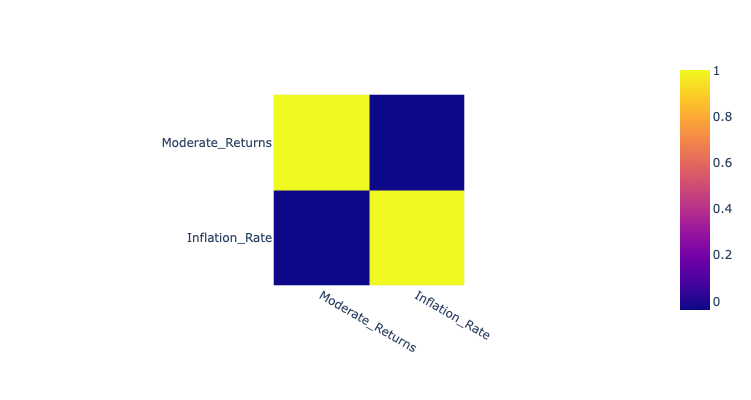

In [132]:
# Correlation Matrix 
# Use the `corr` function to calculate correlations between moderate returns and inflation
corr_moderate_inflation = combined_return_inflation_df[["Moderate_Returns", "Inflation_Rate"]].corr()
# Display de correlation matrix
fig = px.imshow(corr_moderate_inflation, width=400, height=400)
fig.show()

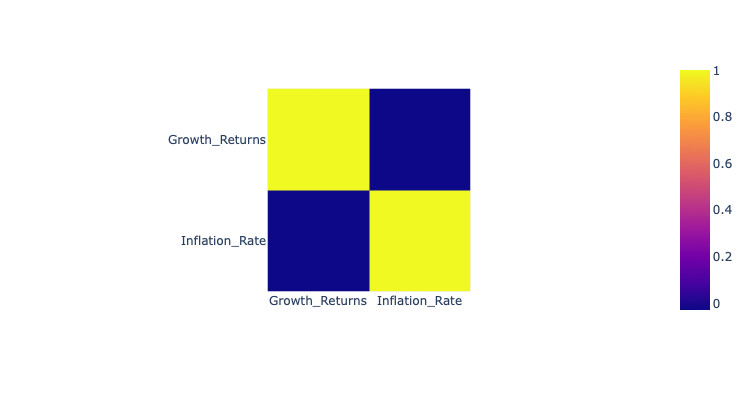

In [133]:
# Use the `corr` function to calculate correlations between growth returns and inflation
corr_growth_inflation = combined_return_inflation_df[["Growth_Returns", "Inflation_Rate"]].corr()
# Display de correlation matrix
fig = px.imshow(corr_growth_inflation, width=400, height=400)
fig.show()

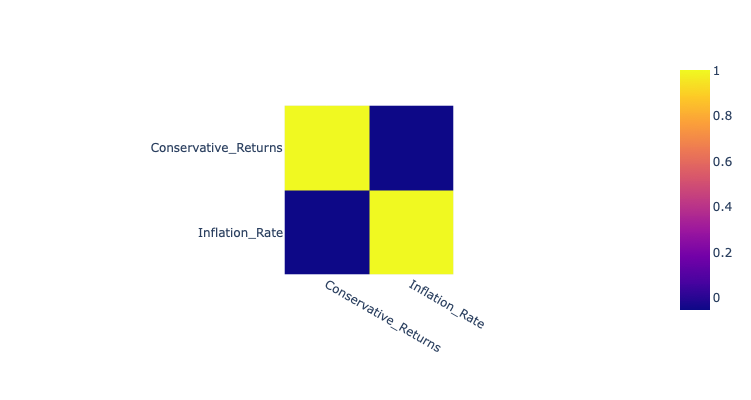

In [134]:
# Use the `corr` function to calculate correlations between conservative returns and inflation
corr_conservative_inflation = combined_return_inflation_df[["Conservative_Returns", "Inflation_Rate"]].corr()
# Display de correlation matrix
fig = px.imshow(corr_conservative_inflation, width=400, height=400)
fig.show()


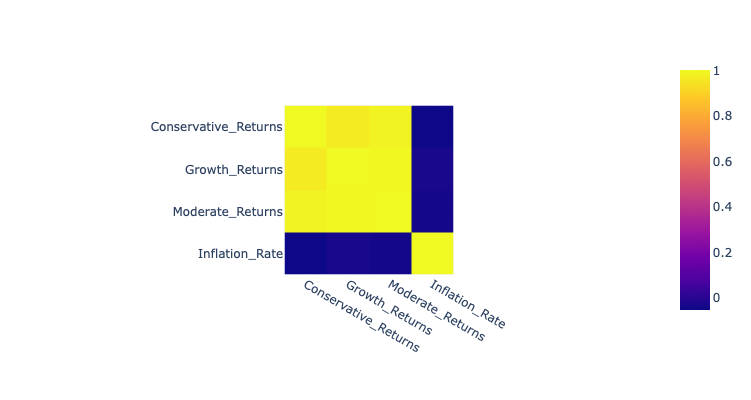

In [135]:
# Calculate the correlation with inflation
correlation_combined = combined_return_inflation_df.corr()
# Display de correlation matrix
fig = px.imshow(correlation_combined, width=400, height=400)
fig.show()


In [136]:
#Summary of Coorelation Table - Alternatively we could also use SNS HEATMAP
#sns.heatmap(correlation_combined)

## Focus - 2021

In [137]:
# Slice DataFrame into 1 year timeframe of 2021
inflation_returns_2021 = combined_return_inflation_df.loc["2021-01":"2021-12"]
inflation_returns_2021

,Conservative_Returns,Growth_Returns,Moderate_Returns,Inflation_Rate
Date,,,,
2021-01-01,-0.005935,-0.003683,-0.004809,0.0140
2021-02-01,0.002633,0.020114,0.011373,0.0168
2021-03-01,0.000871,0.017361,0.009116,0.0262
2021-04-01,0.022514,0.036255,0.029384,0.0416
2021-05-01,0.006808,0.011449,0.009129,0.0499
2021-06-01,0.005013,0.008549,0.006781,0.0539
2021-07-01,0.008111,0.007105,0.007608,0.0537
2021-08-01,0.007666,0.018968,0.013317,0.0525
2021-09-01,-0.024183,-0.037838,-0.031011,0.0539


In [138]:
## # Plot the 2021 monthly returns Vs Inflation
inflation_returns_2021.hvplot.line(title='2021 Monthly Returns of Portfolios Vs Monthly Inflation',
                                         rot=90, width=800, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Panel Dashboard

In [139]:
## Panel Dashboard
## In this section, we will combine the plots into a single dashboard view using Panel.

In [140]:
#Prep code of Panel Dashboard
#Create DF of Asset Allocation - to be used in panel
asset_allocation = {'conservative_allocation':[0.48, 0.12, 0.14, 0.26],
        'growth_allocation':[0.16, 0.04, 0.28, 0.52],
         'moderate_allocation':[0.32, 0.08, 0.21, 0.39],
                      }

In [141]:
asset_allocation_df = pd.DataFrame(asset_allocation,index = ['US Bond Market - VBMFX ',
                                                             'Global Bond - PIGLX',
                                                             'Global Stock Market - VGTSX',
                                                             'US Stock Market - VTSMX'])

In [142]:
asset_allocation_df

,conservative_allocation,growth_allocation,moderate_allocation
US Bond Market - VBMFX,0.48,0.16,0.32
Global Bond - PIGLX,0.12,0.04,0.08
Global Stock Market - VGTSX,0.14,0.28,0.21
US Stock Market - VTSMX,0.26,0.52,0.39


In [143]:
#Create bar chart for Asset Allocation - to be used in panel
def create_bar_chart(data, title, xlabel, ylabel, color_value):
    bar_plot = data.hvplot.bar(
        xlabel= xlabel,
        ylabel= ylabel,
        title= title,
        color= color_value
    )
    return bar_plot

#Inflation Data for Graph
inflation_df.reset_index(inplace=True)
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'])
inflation_df.set_index('Date',inplace=True)

In [144]:
# Define the dashboard welcome text1
welcome_text = "This dashboard presents a visual analysis of Conservative, Moderate and Growth "
welcome_text += "Portfolios comprised of known ETFs in the US Stock Market: "
welcome_text += "VTSMX - Vanguard Total Stock Market Index Fund, VGTSX - Vanguard Total International Stock Index Fund "
welcome_text += "VBMFX - Vanguard Total Bond Market Index Fund, PIGLX - PIMCO Global Opporunities Fund (Unhedged) "
welcome_text += "according to stock data from 2012 to 2021. Also, we have considered the last 10 years of US inflation data "
welcome_text += "to analyze whcih investment portfolio would be best in terms of real returns (inflationary enviornment) "
welcome_text  += "You can navigate through the tabs above to explore these visualizations " 
welcome_text += "of data and performance across last 10 years. "


## Create content for first tab - "Welcome"
first_tab = pn.Column("", welcome_text, cumulative_returns_index.hvplot.line(title="Cumulative Daily Returns of All Index", rot=90, width=900, height=400))

 
## Create content for second tab - "Asset Allocations"

# Put in two rows to acheive required layout
row1_of_tab2 = pn.Row(create_bar_chart(asset_allocation_df['conservative_allocation'], 
                                               "Conservative Portfolio Asset Allocation", "Asset Allocation%", 
                                               "Asset Classification", "Blue"))
row2_of_tab2 = pn.Row(create_bar_chart(asset_allocation_df['moderate_allocation'], 
                                               "Moderate Portfolio Asset Allocation", "Asset Allocation%", 
                                               "Asset Classification", "Yellow"))
row3_of_tab2 = pn.Row(create_bar_chart(asset_allocation_df['growth_allocation'], 
                                               "Growth Portfolio Asset Allocation", "Asset Allocation%", 
                                               "Asset Classification", "Green"))

second_tab = pn.Column(row1_of_tab2, row2_of_tab2, row3_of_tab2)

        
## Create content for third tab - "Monthly Inflation"

##third_tab = pn.Column()
third_tab = pn.Column(inflation_df.hvplot(title='Monthly Inflation', shared_axes = False, grid=True, rot=90, width=1300, height=500))

## Creating content for fourth tab - "Monthly Returns"

row1_of_tab4 = pn.Row(combined_return_inflation_df.hvplot.line(title='Monthly Returns of Portfolios',
                                         rot=90, width=1300, height=500, shared_axes=False))
row2_of_tab4 = pn.Row(real_returns_df.hvplot.line(title='Real Monthly Returns of Portfolios - Adjusted for Inflation',
                                         rot=90, width=1350, height=500, shared_axes=False))

fourth_tab = pn.Column(row1_of_tab4, row2_of_tab4)

## Creating content for fifth tab - "Performance""

row1_of_tab5 = pn.Row(cumulative_returns.hvplot.line(title='Cumulative Returns of Conservative, Growth and Moderate', 
                                                    rot=90, width=800, height=400, ylim=(0,0.5)))
row2_of_tab5 = pn.Row(cumulative_real_returns_index.hvplot.line(title="Cumulative Real Returns of Conservative, Growth and Moderate", 
                                                                rot=90, width=800, height=400, ylim=(0,0.5)))

fifth_tab = pn.Column(row1_of_tab5, row2_of_tab5)



## Creating content for sixth tab - "Findings"
# Put in two rows to acheive required layout

conclusion_text = "Inflation does play an important role in determining the real returns of a portfolio "
conclusion_text += "and investors must consider the impact of inflation especially given the current trend where US inflation has touched the highest level in 39 years. "
conclusion_text += "The greatest increase being between 2020 and 2021 where it went from 1.2% to 6.8% "
conclusion_text += "In our analysis we reviewed the monthly inflation impact over monthly returns of each type of Portfolio i.e Growth, Moderate and Conservative. "
conclusion_text += "We also reviewed the correlation of the monthly returns to monthly inflation trends.Investors will need to decrease exposure to bond or fixed income assets. "

row2_of_tab6 = pn.Row(inflation_returns_2021.hvplot.line(title='2021 Monthly Returns of Portfolios Vs Monthly Inflation',
                                         rot=90, width=700, height=500, shared_axes=False))

sixth_tab = pn.Column(conclusion_text,row2_of_tab6)


# Create a tab layout for the dashboard and assign the tabs built with content above
dashboard = pn.Tabs(
    ("Welcome", first_tab),
    ("Asset Allocation", second_tab),
    ("Monthly Inflation", third_tab),
    ("Monthly Returns", fourth_tab),
    ("Performance", fifth_tab),
    ("Findings", sixth_tab)
)
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] HoloViews(NdOverlay)
    [1] Column
        [0] Row
            [0] HoloViews(Bars)
        [1] Row
            [0] HoloViews(Bars)
        [2] Row
            [0] HoloViews(Bars)
    [2] Column
        [0] HoloViews(Curve)
    [3] Column
        [0] Row
            [0] HoloViews(NdOverlay)
        [1] Row
            [0] HoloViews(NdOverlay)
    [4] Column
        [0] Row
            [0] HoloViews(NdOverlay)
        [1] Row
            [0] HoloViews(NdOverlay)
    [5] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(NdOverlay)